In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Data Read 
def readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('./data/linearX.csv')
x = x.reshape((99,)) 
#Normalization
x = (x-x.mean())/x.std()

y = readData('./data/linearY.csv')
y = y.reshape((99,))
print(x.shape)
print(y.shape)

(99,)
(99,)


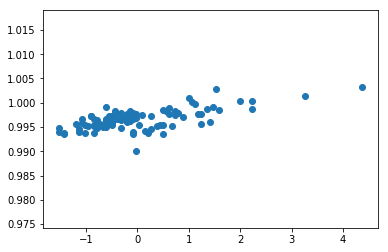

In [12]:
plt.scatter(x,y)
plt.show()

In [33]:
def hypothesis(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    e = 0
    for i in range(X.shape[0]):
        e += (Y[i] - hypothesis(theta,X[i]))**2
    
    return 0.5*e
def gradient(Y,X,theta):
    grad = np.array([0.0,0.0])
    #Sum of gradients over all examples
    for i in range(X.shape[0]):
        grad[0] += (Y[i]-hypothesis(theta,X[i]))
        grad[1] += (Y[i]-hypothesis(theta,X[i]))*X[i]
    
    return grad
        
    

def gradientDescent(X,Y,learning_rate,maxItr):
    
    theta = np.array([0.0,0.0])
    grad = np.array([0.0,0.0])
    
    elist = []
    
    for i in range(maxItr):
        e = error(X,Y,theta)
        elist.append(e)
        grad = gradient(Y,X,theta)
        #uupdate theta
        theta[0] = theta[0] + learning_rate*grad[0]
        theta[1] = theta[1] + learning_rate*grad[1]
        
    return theta,elist
        
    

In [47]:
theta,error_list = gradientDescent(x,y,learning_rate=0.001,maxItr=1000)

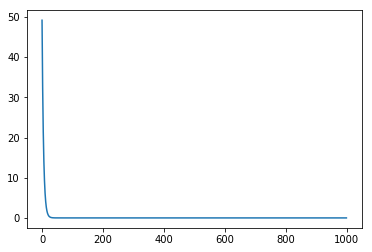

In [48]:
plt.plot(error_list)

In [49]:
print(theta)

[0.99663414 0.00135794]


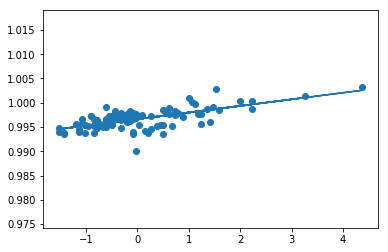

In [50]:
plt.scatter(x,y)
plt.plot(x,hypothesis(theta,x))